Analiza podatkov

In [22]:
import pandas as pd
%matplotlib inline

RECEPTI=pd.read_csv("podatki.csv")
RECEPTI

,Ime recepta,Število sestavin,Število besed v receptu,Število odstavkov,Težavnost,Čas priprave,Čas kuhanja,Skupni čas,Vrsta kuhinje,Energijska vrednost na porcijo
0,-cokoladna-rulada-z-jagodami,14,198,6,2,20 min,15 min,35 min,Poletje,197.86 kCal
1,-losos-z-rezanci,12,193,4,2,12 min,16 min,28 min,Azijska,277.55 kCal
2,-polpeti-iz-brazilskih-oresckov-in-soncnicnih-...,10,148,4,2,5 h 0 min,20 min,5 h 20 min,Vegetarijanstvo,311.88 kCal
3,affogato,3,45,2,1,5 min,0 min,5 min,Pijača,231.3 kCal
4,afriska-sladica,5,96,2,1,20 min,0 min,20 min,Kuhinje,502.61 kCal
...,...,...,...,...,...,...,...,...,...,...
6577,zvitki-s-kuhanim-prsutom-in-skuto,3,43,1,1,15 min,0 min,15 min,Piknik in žar,0 kCal
6578,zvitki-s-prsutom-mocarelo-in-baziliko,5,68,2,1,15 min,0 min,15 min,Poletje,190.56 kCal
6579,zvitki-s-solato-nicoise,12,237,7,1,10 min,20 min,30 min,Piknik in žar,52.32 kCal
6580,zvitki-s-tuninim-nadevom,10,142,4,1,20 min,0 min,20 min,Zabava,54.02 kCal


<Axes: xlabel='Vrsta kuhinje'>

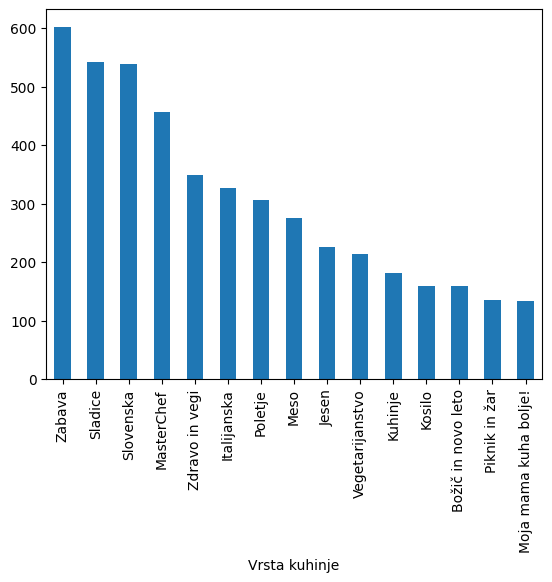

In [23]:
podtabela = RECEPTI[["Vrsta kuhinje"]].copy()
po_vrsti_kuhinje = podtabela.groupby("Vrsta kuhinje").size()
df = pd.DataFrame(po_vrsti_kuhinje, columns=['Count']).reset_index().sort_values('Count', ascending=False)

# vzamem "n" (15) stolpcev ker obstaja preko 80 različnih oznak za vrsto kuhinje na strani okusno.je
n = 15
df_top_n = df.head(n)


df_top_n.plot.bar(x='Vrsta kuhinje', y='Count', legend=False)

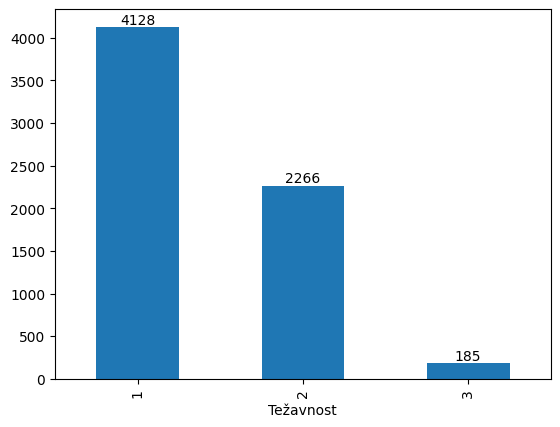

In [24]:
podtabela2 = RECEPTI[["Težavnost"]].copy()
po_težavnosti = podtabela2.groupby("Težavnost").size()

resetan_index = pd.DataFrame(po_težavnosti, columns=['Count']).reset_index().sort_values('Count', ascending=False)

# vzamem samo 3 stolpce ker obstaja še 4. stolpec, kjer so recepti ki niso imeli težavnosti
n = 3
res_top_n = resetan_index.head(n)
#oštevilčenje
graf = res_top_n.plot.bar(x='Težavnost', y='Count', legend=False)
for index, value in enumerate(res_top_n['Count']):
    graf.text(index, value, str(value), ha='center', va='bottom')
